## Manifold Learning - Swissroll

Create several points in 2d, and then map them to 3d with some smooth function, and then visualize multiple Manifold Learning algorithms when they map the points back to 2d

Reference: https://scikit-learn.org/stable/auto_examples/manifold/plot_swissroll.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_swiss_roll
from sklearn.manifold import MDS, TSNE, locally_linear_embedding, Isomap

<img src="https://www.theflavorbender.com/wp-content/uploads/2020/11/Choc-Swiss-Roll-2855-2.jpg" width="20%">

In [2]:
sr_points, sr_color = make_swiss_roll(n_samples=1500, random_state=0)

In [8]:
sr_points

array([[ -8.85708287,   9.38265973,  -4.38885338],
       [  5.0569229 ,  17.57679767, -10.2760021 ],
       [ -5.88799247,   4.65830464,  -8.56459157],
       ...,
       [  5.02792391,   6.7958879 ,  -2.831356  ],
       [  1.98714514,  17.08444537,  -4.70959971],
       [  5.75356613,  14.64540795,   3.73357428]])

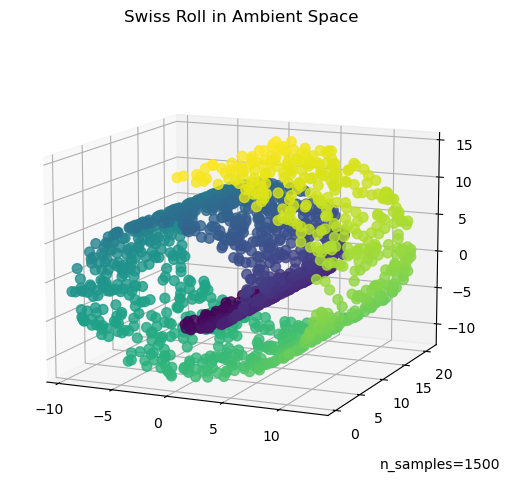

In [3]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

### Manifold Learning Models

In [5]:
#Multidimensional Scaling
sr_mds = MDS(n_components=2).fit_transform(sr_points)

#Isomap
sr_iso = Isomap(n_components=2).fit_transform(sr_points)

#Locally Linear Embedding (LLE)
sr_lle, sr_err = locally_linear_embedding(
    sr_points, n_neighbors=12, n_components=2
)

#t-SNE
sr_tsne = TSNE(n_components=2, perplexity=40, random_state=0).fit_transform(
    sr_points
)

C:\Users\nuke2\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\nuke2\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [7]:
sr_points

array([[ -8.85708287,   9.38265973,  -4.38885338],
       [  5.0569229 ,  17.57679767, -10.2760021 ],
       [ -5.88799247,   4.65830464,  -8.56459157],
       ...,
       [  5.02792391,   6.7958879 ,  -2.831356  ],
       [  1.98714514,  17.08444537,  -4.70959971],
       [  5.75356613,  14.64540795,   3.73357428]])

In [ ]:
fig, axs = plt.subplots(figsize=(8, 14), nrows=4)

axs[0].scatter(sr_mds[:, 0], sr_mds[:, 1], c=sr_color)
axs[0].set_title("MDS Embedding of Swiss Roll")

axs[1].scatter(sr_iso[:, 0], sr_iso[:, 1], c=sr_color)
axs[1].set_title("Isomap Embedding of Swiss Roll")

axs[2].scatter(sr_lle[:, 0], sr_lle[:, 1], c=sr_color)
axs[2].set_title("LLE Embedding of Swiss Roll")

axs[3].scatter(sr_tsne[:, 0], sr_tsne[:, 1], c=sr_color)
axs[3].set_title("t-SNE Embedding of Swiss Roll")